# Keywords:  Basemap, Animation, Plotly, Air Quality Index

## 1. Introduction
Air quality level can be displayed through various ways. In this notebook, I use Basemap and matplotlib's animation method. I used shapefiles for the US and the state of California readily available (and searchable) via Google, such as links below:

<a href="https://infosys.ars.usda.gov/svn/code/weps1/trunk/weps.install/db/gis/st99_d00/">US Shapefile</a> and <a href="http://52.26.186.219/internships/useit/content/california-counties-shapefiles">California Shapefile</a>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
poll = pd.read_csv("../input/pollution_us_2000_2016.csv")

## 2. Peek through the dataset
Remove unnecessary columns first of all. We would rather need the air quality level of each category, not necessarily the absolute values. So I'll only use Air Quality Index (AQI) as defined by EPA. More detailed information on the Index can be found below the link:
<a href="https://cfpub.epa.gov/airnow/index.cfm?action=aqibasics.aqi">EPA Air Quality Index Basic Page</a>
The dateset has 4 air pollution categories that are NO2, O3, SO2, and CO. It might have been better if the dataset contained particle pollution (or particulate matter - PM) level too - which would cause similarly important health issues. 

In [3]:
poll = poll.drop(['Unnamed: 0','State Code','County Code','Site Num','Address','NO2 Units','O3 Units','SO2 Units','CO Units'],axis=1)
poll.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN


Some entries have several values for the same observation date. As there's no specific explanation for these duplications nor answers to questions to the forum, I'll get the mean values for each date and location (state in the case below). 

In [4]:
## Prepare all 4 AQIs against state and date 
pollSt = poll[['State','Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]
pollSt = pollSt.dropna(axis='rows')  # Delete rows with NAs
pollSt = pollSt[pollSt.State!='Country Of Mexico']  # Delete Mexico
pollSt['Date Local'] = pd.to_datetime(pollSt['Date Local'],format='%Y-%m-%d')  # Change date from string to date value
pollSt = pollSt.groupby(['State','Date Local']).mean()  # Take mean values if there are depulicated entries
pollStGrouped = pollSt.groupby(level=0)

Plot all 4 AQIs with the top 4 states that have the maximum mean AQI value over time. When plotting, take monthly mean values as the representative values.

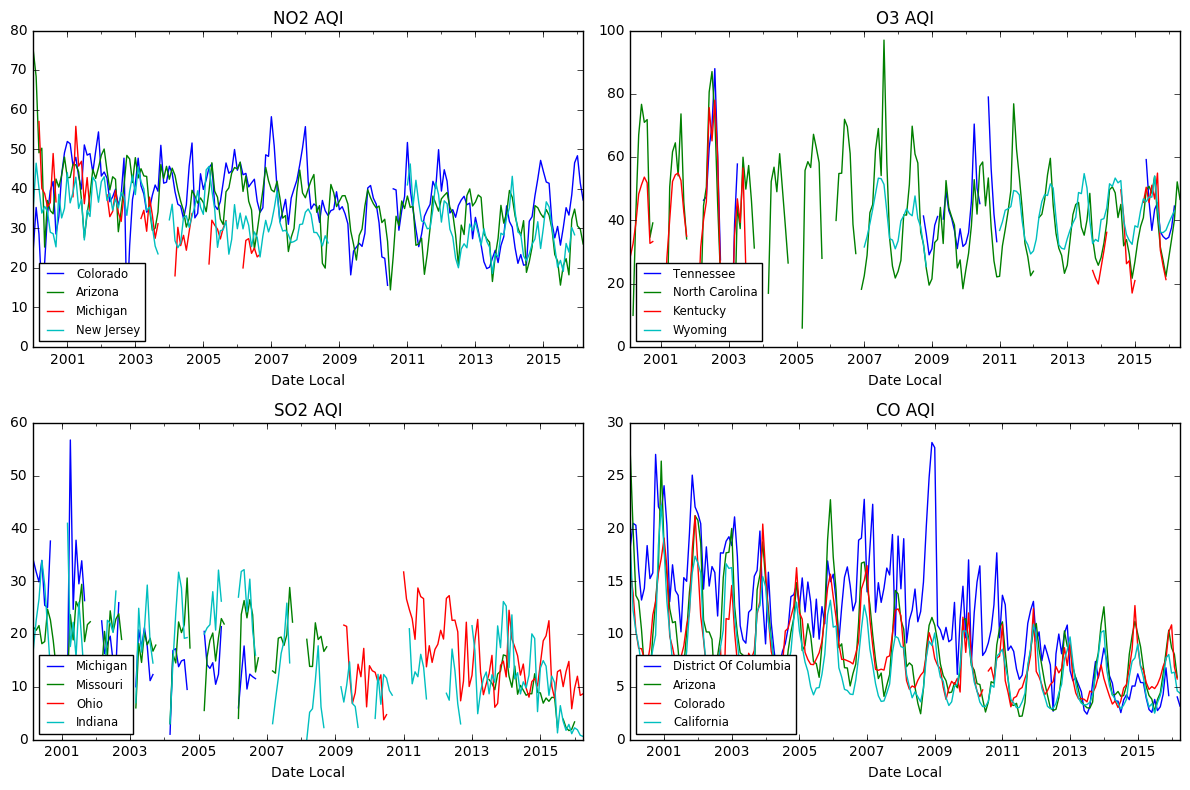

In [5]:
## Plot 4 AQIs with top 4 states
plt.figure(figsize=(12,8))

# NO2 AQI
plt.subplot(221)
pollNO2 = pollStGrouped['NO2 AQI']
pollNO2Top = pollNO2.mean().nlargest(4).index
for i in range(len(pollNO2Top)):
    pollNO2.get_group(pollNO2Top[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(pollNO2Top,loc=3,fontsize='small')
plt.title('NO2 AQI')

# O3 AQI
plt.subplot(222)
pollO3 = pollStGrouped['O3 AQI']
pollO3Top = pollO3.mean().nlargest(4).index
for i in range(len(pollO3Top)):
    pollO3.get_group(pollO3Top[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(pollO3Top,loc=3,fontsize='small')
plt.title('O3 AQI')

# SO2 AQI
plt.subplot(223)
pollSO2 = pollStGrouped['SO2 AQI']
pollSO2Top = pollSO2.mean().nlargest(4).index
for i in range(len(pollSO2Top)):
    pollSO2.get_group(pollSO2Top[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(pollSO2Top,loc=3,fontsize='small')
plt.title('SO2 AQI')

# CO AQI
plt.subplot(224)
pollCO = pollStGrouped['CO AQI']
pollCOTop = pollCO.mean().nlargest(4).index
for i in range(len(pollCOTop)):
    pollCO.get_group(pollCOTop[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(pollCOTop,loc=3,fontsize='small')
plt.title('CO AQI')

plt.tight_layout()
plt.show()

## 3. Animation display
Now, I'll pick only a couple of states to show the evolution of the indexes over time. I picked only 4 but you can go on and on with more states to complete through the entire U.S, this is just to showcase. For values resampled over month, I take maximum values rather than mean as it depicts the level of danger of the month. Mean can hide abnormal/extreme values. 

In [6]:
## California AQIs - resampled monthly
pollCal = poll[(poll.State=='California')].copy()
pollCal['Date Local'] = pd.to_datetime(pollCal['Date Local'],format='%Y-%m-%d')
aqiCal = pollCal[['Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']].groupby(['Date Local'])
aqiCal = aqiCal.mean()
aqiCal = aqiCal.resample('M').max() # Take maximum value over month for 4 AQIs. You can also use mean()

In [7]:
## Texas AQIs - resampled monthly
pollTex = poll[(poll.State=='Texas')].copy()
pollTex['Date Local'] = pd.to_datetime(pollTex['Date Local'],format='%Y-%m-%d')
aqiTex = pollTex[['Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']].groupby(['Date Local'])
aqiTex = aqiTex.mean()
aqiTex = aqiTex.resample('M').max()

In [8]:
## New York AQIs - resampled monthly
pollNY = poll[(poll.State=='New York')].copy()
pollNY['Date Local'] = pd.to_datetime(pollNY['Date Local'],format='%Y-%m-%d')
aqiNY = pollNY[['Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']].groupby(['Date Local'])
aqiNY = aqiNY.mean()
aqiNY = aqiNY.resample('M').max()

In [9]:
## Illinois AQIs - resampled monthly
pollIL = poll[(poll.State=='Illinois')].copy()
pollIL['Date Local'] = pd.to_datetime(pollIL['Date Local'],format='%Y-%m-%d')
aqiIL = pollIL[['Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']].groupby(['Date Local'])
aqiIL = aqiIL.mean()
aqiIL = aqiIL.resample('M').max()

Import basemap and polygon packages for later use. Magic function matplotlib nbagg is needed for animation. Using shapefile is easy and powerful but there is no way being able to upload shapefiles on ../input folder. I was playing with shapefiles in my notebook but not on Kaggle kernel. So let us go away with using shapefile.

In [10]:
from mpl_toolkits.basemap import Basemap
#from matplotlib.patches import Polygon
#import shapefile
from matplotlib import rc, animation
%matplotlib nbagg

In [11]:
from IPython.display import HTML, Image
#!brew install imagemagick 

<IPython.core.display.Javascript object>


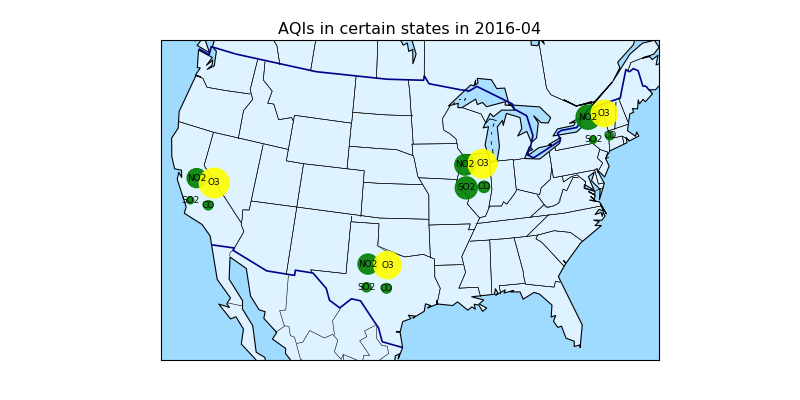

In [23]:
## Plot data onto the basemap with FuncAnimation (displaying 4 AQI data over time)
fig = plt.figure(figsize=(10,5))
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
#map.readshapefile('../input/st99_d00', name='states', drawbounds=True)
map.drawcoastlines()
map.drawmapboundary(fill_color='#9fdbff',zorder=1)
map.fillcontinents(color='#f0f8ff',lake_color='#9fdbff',alpha=0.8,zorder=1)
map.drawcountries(linewidth=1.5, color='darkblue')
map.drawstates()
ax = plt.gca()

## Initialize 
sizesCal = aqiCal.iloc[0]*10
colorsCal = aqiCal.iloc[0]
sizesTex = aqiTex.iloc[0]*10
colorsTex = aqiTex.iloc[0]
sizesNY = aqiNY.iloc[0]*10
colorsNY = aqiNY.iloc[0]
sizesIL = aqiIL.iloc[0]*10
colorsIL = aqiIL.iloc[0]
cmap, norm = mpl.colors.from_levels_and_colors([0,50,100,150,200,300,500], ['green','yellow','orange','red','purple','maroon'])
m = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
plt.title(aqiCal.index[0].strftime('%Y-%m'))

# California
x1,y1=map(-120.4179,37.7783)
x2,y2=map(-118.4179,37.7783)
x3,y3=map(-120.4179,35.7783)
x4,y4=map(-118.4179,35.7783)
scatter1 = map.scatter(np.array([x1,x2,x3,x4]),np.array([y1,y2,y3,y4]),s=sizesCal,c=colorsCal,cmap=cmap,norm=norm,alpha=0.9,edgecolors='face',zorder=2)
x=[x1,x2,x3,x4]
y=[y1,y2,y3,y4]
labels=['NO2','O3','SO2','CO']
for i, txt in enumerate(labels):
    ax.annotate(labels[i],(x[i],y[i]),size=8,va='center',ha='center')

# Texas
x1,y1=map(-100.9018,32.9686)
x2,y2=map(-98.9018,32.9686)
x3,y3=map(-100.9018,30.9686)
x4,y4=map(-98.9018,30.9686)
scatter2 = map.scatter(np.array([x1,x2,x3,x4]),np.array([y1,y2,y3,y4]),s=sizesTex,c=colorsTex,cmap=cmap,norm=norm,alpha=0.9,edgecolors='face',zorder=2)
x=[x1,x2,x3,x4]
y=[y1,y2,y3,y4]
labels=['NO2','O3','SO2','CO']
for i, txt in enumerate(labels):
    ax.annotate(labels[i],(x[i],y[i]),size=8,va='center',ha='center')

# New York
x1,y1=map(-75.2179,44.2994)
x2,y2=map(-73.2179,44.2994)
x3,y3=map(-75.2179,42.2994)
x4,y4=map(-73.2179,42.2994)
scatter3 = map.scatter(np.array([x1,x2,x3,x4]),np.array([y1,y2,y3,y4]),s=sizesNY,c=colorsNY,cmap=cmap,norm=norm,alpha=0.9,edgecolors='face',zorder=2)
x=[x1,x2,x3,x4]
y=[y1,y2,y3,y4]
labels=['NO2','O3','SO2','CO']
for i, txt in enumerate(labels):
    ax.annotate(labels[i],(x[i],y[i]),size=8,va='center',ha='center')    

# Illinois
x1,y1=map(-90.3985,41.6331)
x2,y2=map(-88.3985,41.6331)
x3,y3=map(-90.3985,39.6331)
x4,y4=map(-88.3985,39.6331)
scatter4 = map.scatter(np.array([x1,x2,x3,x4]),np.array([y1,y2,y3,y4]),s=sizesIL,c=colorsIL,cmap=cmap,norm=norm,alpha=0.9,edgecolors='face',zorder=2)
x=[x1,x2,x3,x4]
y=[y1,y2,y3,y4]
labels=['NO2','O3','SO2','CO']
for i, txt in enumerate(labels):
    ax.annotate(labels[i],(x[i],y[i]),size=8,va='center',ha='center')     
    
## Update function for animation
def update(i):
    scatter1.set_sizes(aqiCal.iloc[i]*10)
    scatter1.set_color(m.to_rgba(aqiCal.iloc[i]))
    scatter2.set_sizes(aqiTex.iloc[i]*10)
    scatter2.set_color(m.to_rgba(aqiTex.iloc[i]))
    scatter3.set_sizes(aqiNY.iloc[i]*10)
    scatter3.set_color(m.to_rgba(aqiNY.iloc[i]))
    scatter4.set_sizes(aqiIL.iloc[i]*10)
    scatter4.set_color(m.to_rgba(aqiIL.iloc[i]))
    plt.title('AQIs in certain states in '+aqiCal.index[i].strftime('%Y-%m'))
    return scatter1, scatter2, scatter3, scatter4, 

anim = FuncAnimation(plt.gcf(),update,interval=100,blit=True,repeat=False,frames=196)
anim

## save functions for animation 
#mywriter = animation.FFMpegWriter()
#mywriter = animation.ImageMagickWriter()
#anim.save('aqi.mp4',writer=mywriter)

## 4. Color coding
Another way of plotting AQIs is to color states or counties. I'll focus only on ozone AQI on a random date. Due to lack of data for some states and counties in the original dataset, not all maps can be colored in this case. You can reuse the same function above to make it animated over time too. 

In [419]:
## Ozone AQI for the USA
pollStO3 = pollSt.reset_index()[['State','Date Local','O3 AQI']]
pollStO3 = pollStO3[pollStO3['Date Local']=='2015-06-30'].set_index('State')
pollStO3

,Date Local,O3 AQI
State,,
Alabama,2015-06-30,44.000000
Alaska,2015-06-30,23.000000
Arizona,2015-06-30,43.666667
Arkansas,2015-06-30,46.000000
California,2015-06-30,57.913043
Colorado,2015-06-30,61.666667
Connecticut,2015-06-30,50.000000
District Of Columbia,2015-06-30,50.000000
Florida,2015-06-30,26.000000


Well.. I can't upload my shapefile so this code won't be working when I publish on Kaggle. I'll try another way by using Plotly. You can meanwhile try this on your inotebook with shapefile (link provided above)

<IPython.core.display.Javascript object>


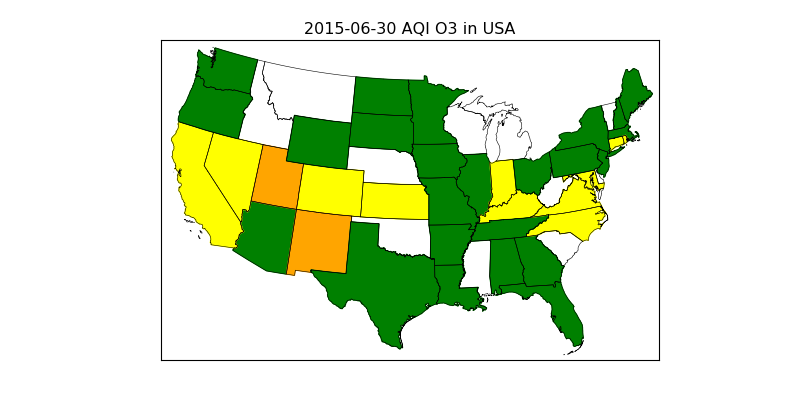

In [420]:

## Create the map
fig = plt.figure(figsize=(10,5))
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
map.readshapefile('../input/st99_d00', name='states', drawbounds=True)

# Collect the state names from the shapefile attributes
state_names = []
for shape_dict in map.states_info:
    state_names.append(shape_dict['NAME'])
    
ax = plt.gca()
cmap, norm = mpl.colors.from_levels_and_colors([0,50,100,150,200,300,500], ['green','yellow','orange','red','purple','maroon'])
m = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i,state in enumerate(pollStO3.index):
    color = m.to_rgba(pollStO3['O3 AQI'][state])
    if state!='District Of Columbia': 
        seg = map.states[state_names.index(state)]
    poly = Polygon(seg, facecolor=color,edgecolor=color)
    ax.add_patch(poly)

plt.title('2015-06-30 AQI O3 in USA')
plt.show()


In [421]:
## Ozone AQI for the State of California
aqiO3Cal = pollCal[['County','Date Local','O3 AQI']]
aqiO3Cal = aqiO3Cal[aqiO3Cal['Date Local']=='2009-08-31'].groupby(['County'])
aqiO3Cal = aqiO3Cal.max()
aqiO3Cal

,Date Local,O3 AQI
County,,
Alameda,2009-08-31,19
Contra Costa,2009-08-31,33
Fresno,2009-08-31,67
Humboldt,2009-08-31,19
Imperial,2009-08-31,31
Los Angeles,2009-08-31,151
Orange,2009-08-31,45
Riverside,2009-08-31,119
Sacramento,2009-08-31,34


Download a shapefile for the state of California and put color as per the AQI color code (only on the counties whose data is available). You can do it on your inotebook with shapefile downloaded. I'll just comment this out for now.

<IPython.core.display.Javascript object>


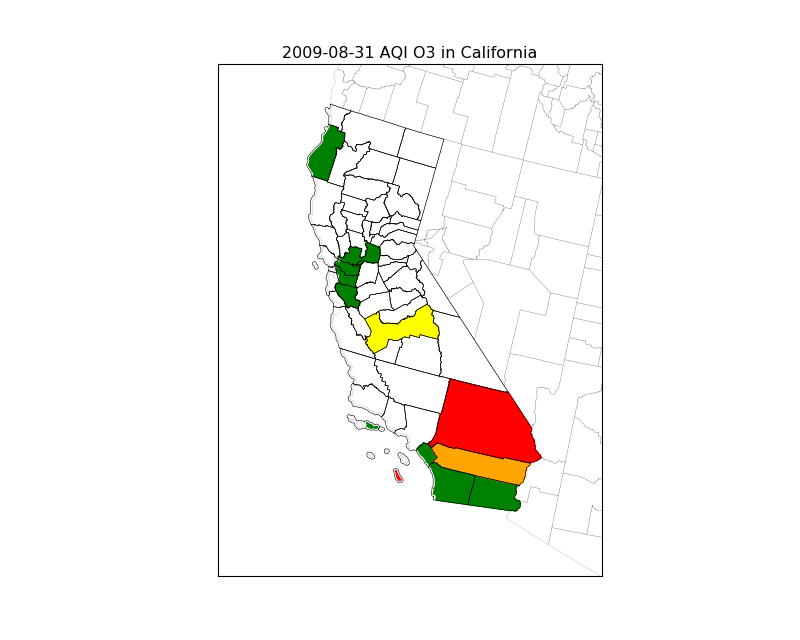

In [422]:
## Create the map
plt.figure(figsize=(10,8))
map = Basemap(llcrnrlon=-123,llcrnrlat=29,urcrnrlon=-115,urcrnrlat=45,
              projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# Load the shapefile, use 'counties'
map.readshapefile('../input/CaliforniaCounty',name='counties',drawbounds=True)
map.drawcounties()

# Collect the county names from the shapefile attributes
county_names = []
for shape_dict in map.counties_info:
    county_names.append(shape_dict['NAME'])
    
ax = plt.gca()
cmap, norm = mpl.colors.from_levels_and_colors([0,50,100,150,200,300,500], ['green','yellow','orange','red','purple','maroon'])
m = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i,county in enumerate(aqiO3Cal.index):
    color = m.to_rgba(aqiO3Cal['O3 AQI'][county])
    seg = map.counties[county_names.index(county)]
    poly = Polygon(seg, facecolor=color,edgecolor=color)
    ax.add_patch(poly)

plt.title('2009-08-31 AQI O3 in California')
plt.show()

Let's try then with Plotly. 

In [22]:
import plotly.plotly as py
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

In [24]:
## To use plotly choropleth maps, states names must be encoded.
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [152]:
pollStO3 = pollStO3.reset_index()
pollStO3 = pollStO3[pollStO3['State']!='District Of Columbia']
pollStO3['State_abbrev'] = pollStO3.State.apply(lambda x: us_state_abbrev[x])

In [231]:
## Create 'dynamic' colorscale - it seems plotly doesn't provide fixed colorscale, so we should keep the colorcode fixed with some calculation...
def scale(aqiSeries):
    cmax = aqiSeries.max()
    cmin = aqiSeries.min()
    dt = 1e-5
    cg = min((50-cmin)/(cmax-cmin)+dt,1.0)
    cy = min((100-cmin)/(cmax-cmin)+dt,1.0)
    co = min((150-cmin)/(cmax-cmin)+dt,1.0)
    cr = min((200-cmin)/(cmax-cmin)+dt,1.0)
    cp = min((300-cmin)/(cmax-cmin)+dt,1.0)
    cm = min((500-cmin)/(cmax-cmin)+dt,1.0)

    colorcode = [cg,cy,co,cr,cp,cm]
    colors = ['green','yellow','orange','red','purple','maroon']
    scl = []
    prev = 0
    for i in range(len(colorcode)):
        scl.extend([[prev,colors[i]],[colorcode[i],colors[i]]])
        prev=colorcode[i]
        if colorcode[i]==1.0: break
    
    return scl

Now, I put data and layout parts for plotly choropleth. It offers you a very decent (and interactive) visulational results.

In [232]:
data = [ dict(
        type='choropleth',
        colorscale = scale(pollStO3['O3 AQI']),
        autocolorscale = False,
        locations = pollStO3.State_abbrev,
        z = pollStO3['O3 AQI'],
        locationmode = 'USA-states',
        #text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(227,227,227)',
                width = 1.5
            ) ),
        ) ]

layout = dict(
        title = '2015-06-30 AQI O3 in US',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

figure = dict(data = data, layout = layout)
iplot(figure)

At last, I'll put together monthly maximum AQIs (whichever AQI it is in the month) throughout 2015. It allows you to see the major trends of how the max AQI values (and its color code) changes month by month. 

In [390]:
## Create MaxAQI and MAXAQIValue that dipict the worst AQI and its value of the month
pMonth = []
months = ['2015-01-31','2015-02-28','2015-03-31','2015-04-30','2015-05-31','2015-06-30',
        '2015-07-31','2015-08-31','2015-09-30','2015-10-31','2015-11-30','2015-12-31']
pollStMonth = pollSt.reset_index(level=0).groupby(['State']).resample('M').max().drop(['State'],axis=1)
pollStMonth = pollStMonth.reset_index()

for i,month in enumerate(months):
    p = pollStMonth[pollStMonth['Date Local']==month].copy()
    p['MaxAQIValue'] = p.max(axis=1)
    p['MaxAQI'] = p.drop(['State','Date Local'],axis=1).idxmax(axis=1)

    p = p[p['State']!='District Of Columbia']
    p['State_abbrev'] = p.State.apply(lambda x: us_state_abbrev[x])
    pMonth.append(p[p['MaxAQI'].notnull()])

In [406]:
data=[]
layout = dict(
        title = 'Monthly Max AQI in 2015',
        width = 1000,
        height = 600
)

for i in range(12):
    geo_key = 'geo'+str(i+1) if i != 0 else 'geo'
    data.append(dict(
        type='choropleth',
        locationmode = 'USA-states',
        z = pMonth[i]['MaxAQIValue'],
        colorscale = scale(pMonth[i]['MaxAQIValue']),
        autocolorscale = False,
        locations = pMonth[i].State_abbrev,
        text = pMonth[i]['MaxAQI'].apply(lambda x:x[:-3]),
        showscale =False,
        geo=geo_key,
        marker = dict(line = dict(color='rgb(227,227,227)',width = 1.5)),
        ))
    
    data.append(dict(
        type = 'scattergeo',
        showlegend = False,
        lon = [-80],
        lat = [48],
        geo = geo_key,
        text = months[i][:-3],
        mode = 'text',
        ))
    layout[geo_key] = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            domain = dict( x = [], y = [] ),
            lakecolor = 'rgb(255, 255, 255)')
z = 0
COLS = 4
ROWS = 3
for y in reversed(range(ROWS)):
    for x in range(COLS):
        geo_key = 'geo'+str(z+1) if z != 0 else 'geo'
        layout[geo_key]['domain']['x'] = [float(x)/float(COLS), float(x+1)/float(COLS)]
        layout[geo_key]['domain']['y'] = [float(y)/float(ROWS), float(y+1)/float(ROWS)]
        z=z+1

figure = dict(data = data, layout = layout)
iplot(figure)

# 5. End note
This notebook was created with a focus on the usage of basemap with the animation tool and plotly. Basemap and plotly is a great tool for communication when it comes to geographic information particularly for environmental information such as air/water pollution, climate change, biodiversity and so forth. Basemap can be more powerful with shapefiles that you can easily access to free resources. It was a great exercise to handle this type of dataset with basemap and plotly/choropleth maps. I'll appreciate any comment or advice for the notebook above. Good day to you all! 